In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv('student_data.csv')

In [5]:
df = pd.read_csv('student_data.csv', usecols=['sex', 'age'])

In [13]:
string_of_months = "January, February, March, April, May, June, July, August, September, October, November, December"
list_of_months = string_of_months.split(", ")
special_months = list_of_months[:-2]

In [33]:
df['month_of_birth'] = random.choices(list_of_months, k=len(df))
df['special_month_of_birth'] = random.choices(special_months, k=len(df))

In [35]:
df.head()

,sex,age,month_of_birth,special_month_of_birth
0,F,18,May,March
1,F,17,May,April
2,F,15,May,August
3,F,15,June,February
4,F,16,August,April


In [52]:
df['normal'] = np.random.normal(loc = 250, scale= 36, size=len(df))

In [67]:
#I want to create a weird distribution

df['weird_dist'] = [np.log(x+1) if x< 350 else x for x in df.index]

In [63]:
# # [np.log(x+1) if x< 350 else x for x in df.index]

# holder = []

# for x in df.index:
#     if x<350:
#         holder.append(np.log(x+1))
#     else:
#         holder.append(x)

# df['weird_dist'] = holder

## Describe

In [71]:
df.describe(include='all')

,sex,age,month_of_birth,special_month_of_birth,normal,weird_dist
count,395,395.000000,395,395,395.000000,395.000000
unique,2,NaN,12,10,NaN,NaN
top,F,NaN,May,July,NaN,NaN
freq,208,NaN,40,52,NaN,NaN
mean,NaN,16.696203,NaN,NaN,250.664730,46.693987
std,NaN,1.276043,NaN,NaN,38.558842,116.878449
min,NaN,15.000000,NaN,NaN,122.646818,0.000000
25%,NaN,16.000000,NaN,NaN,225.268070,4.600145
50%,NaN,17.000000,NaN,NaN,250.647926,5.288267
75%,NaN,18.000000,NaN,NaN,276.147340,5.692046


In [75]:
df.describe(percentiles=[.2,.4,.6,.75,.8],include='all')

,sex,age,month_of_birth,special_month_of_birth,normal,weird_dist
count,395,395.000000,395,395,395.000000,395.000000
unique,2,NaN,12,10,NaN,NaN
top,F,NaN,May,July,NaN,NaN
freq,208,NaN,40,52,NaN,NaN
mean,NaN,16.696203,NaN,NaN,250.664730,46.693987
std,NaN,1.276043,NaN,NaN,38.558842,116.878449
min,NaN,15.000000,NaN,NaN,122.646818,0.000000
20%,NaN,15.000000,NaN,NaN,220.892664,4.379511
40%,NaN,16.000000,NaN,NaN,241.689434,5.066381
50%,NaN,17.000000,NaN,NaN,250.647926,5.288267


In [78]:
pd.Categorical(df['month_of_birth'])

['May', 'May', 'May', 'June', 'August', ..., 'April', 'July', 'October', 'March', 'August']
Length: 395
Categories (12, object): ['April', 'August', 'December', 'February', ..., 'May', 'November', 'October', 'September']

In [80]:
pd.Categorical(df['special_month_of_birth'])

['March', 'April', 'August', 'February', 'April', ..., 'June', 'October', 'February', 'January', 'February']
Length: 395
Categories (10, object): ['April', 'August', 'February', 'January', ..., 'March', 'May', 'October', 'September']

In [84]:
df['special_month_of_birth'] = pd.Categorical(df['special_month_of_birth'], categories=list_of_months, ordered=True)
df['month_of_birth'] = pd.Categorical(df['month_of_birth'], categories=list_of_months, ordered=True)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   sex                     395 non-null    object  
 1   age                     395 non-null    int64   
 2   month_of_birth          395 non-null    category
 3   special_month_of_birth  395 non-null    category
 4   normal                  395 non-null    float64 
 5   weird_dist              395 non-null    float64 
dtypes: category(2), float64(2), int64(1), object(1)
memory usage: 14.0+ KB


In [90]:
df.sort_values('sex', ascending=False)
df.sort_values('month_of_birth', ascending=False)

,sex,age,month_of_birth,special_month_of_birth,normal,weird_dist
197,M,16,December,April,220.263947,5.288267
282,F,18,December,September,333.751226,5.645447
356,F,17,December,March,223.253188,356.000000
26,M,15,December,July,223.628088,3.295837
159,M,16,December,February,300.093925,5.075174
...,...,...,...,...,...,...
241,M,17,January,May,233.628161,5.488938
162,M,16,January,February,271.083160,5.093750
262,M,18,January,July,296.201760,5.572154
275,F,17,January,October,281.283871,5.620401


## Practice -
### Easier
Make Gender categorical, is there an order to that?<br>
Add another value to the categories saying "Non-binary" or just "Prefer not to say"
### Harder
Make Age categorical, is there an order to that?<br>
Add another value to the categories saying "Prefer not to say"

In [96]:
df['sex'] = pd.Categorical(df['sex'], categories=["F", "M","NB"])

In [103]:
df['sex'].value_counts(normalize=True)

F     0.526582
M     0.473418
NB    0.000000
Name: sex, dtype: float64

In [104]:
df['sex'].value_counts()/len(df)

F     0.526582
M     0.473418
NB    0.000000
Name: sex, dtype: float64

In [132]:
df.groupby('special_month_of_birth')['age'].mean().to_frame().iloc[3]

age    16.513514
Name: April, dtype: float64

In [135]:
df.groupby('special_month_of_birth')['age'].mean().to_frame().loc['May']

age    16.7
Name: May, dtype: float64

In [108]:
df['sex'].value_counts().head(1)

F    208
Name: sex, dtype: int64

In [115]:
print(df['normal'].mean())
print(df['normal'].median())




250.66473040805215
250.6479263616548


In [126]:
df.loc[3]

sex                                F
age                               15
month_of_birth                  June
special_month_of_birth      February
normal                    220.737958
weird_dist                  1.386294
Name: 3, dtype: object

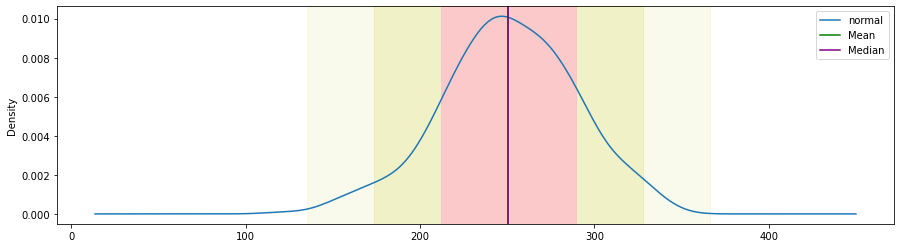

In [140]:
plt.figure(figsize=(15,4))

df['normal'].plot(kind="kde")

plt.axvline(df['normal'].mean(), color= "g", label="Mean")
plt.axvline(df['normal'].median(), c= "purple", label="Median")

plt.axvspan(xmin=df['normal'].mean()-3*df['normal'].std(),xmax=df['normal'].mean()+3*df['normal'].std(),alpha=0.075,color="y" )
plt.axvspan(xmin=df['normal'].mean()-2*df['normal'].std(), xmax=df['normal'].mean()+2*df['normal'].std(), alpha=0.15, color="y" )
plt.axvspan(xmin=df['normal'].mean()-df['normal'].std(), xmax=df['normal'].mean()+df['normal'].std(), alpha=0.8, color="pink" )

plt.legend()


In [141]:
df['new_normal'] = [int(x) for x in np.random.normal(480,80,size=len(df))]


In [144]:
print(df['weird_dist'].mean())
print(df['weird_dist'].median())

46.6939867019616
5.288267030694535


In [145]:
df['weird_dist'].mode()

0        0.000000
1        0.693147
2        1.098612
3        1.386294
4        1.609438
          ...    
390    390.000000
391    391.000000
392    392.000000
393    393.000000
394    394.000000
Name: weird_dist, Length: 395, dtype: float64

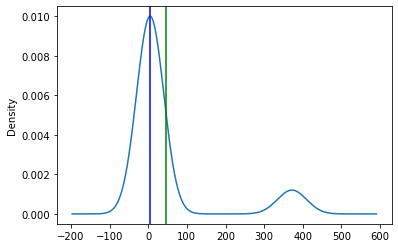

In [148]:
df['weird_dist'].plot(kind="kde")
plt.axvline(df['weird_dist'].mean(), c= "g", label="Mean")
plt.axvline(df['weird_dist'].median(), c= "b", label="Median")

<AxesSubplot:ylabel='Frequency'>

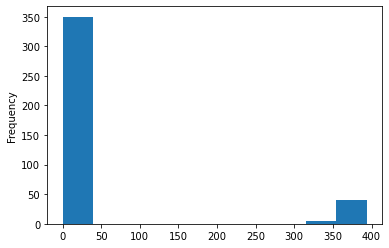

In [149]:
df['weird_dist'].plot(kind="hist")

In [152]:
df['normal'].min()

122.64681848935024

In [151]:
df['normal'].mean()-3*df['normal'].std(), df['normal'].mean()+3*df['normal'].std()

(134.98820492498265, 366.34125589112165)

In [154]:
df['normal'].max()

340.81925480299736

## Practice
plot new_weird_dist

df['new_weird_dist'] = [int(x) for x in np.random.chisquare(1, len(df))]